In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [7]:
X = df.drop("Class",axis=1)
Y = df.Class

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.7,random_state=2,stratify=Y)

In [14]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700,900,1000] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500]

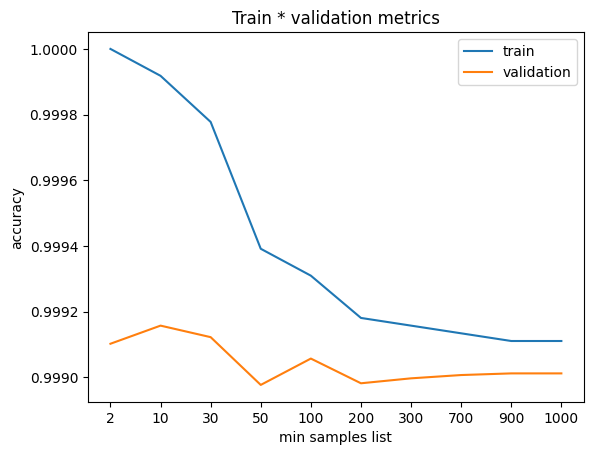

In [10]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=2)
    model.fit(X_train,Y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train,Y_train)
    accuracy_test = accuracy_score(prediction_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
plt.title("Train * validation metrics")
plt.xlabel("min samples list")
plt.ylabel("accuracy")
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(["train","validation"])
# reqd lower min samples split and higher max depth
# training error less and validation error means overfiiting so it is btter to hae it 

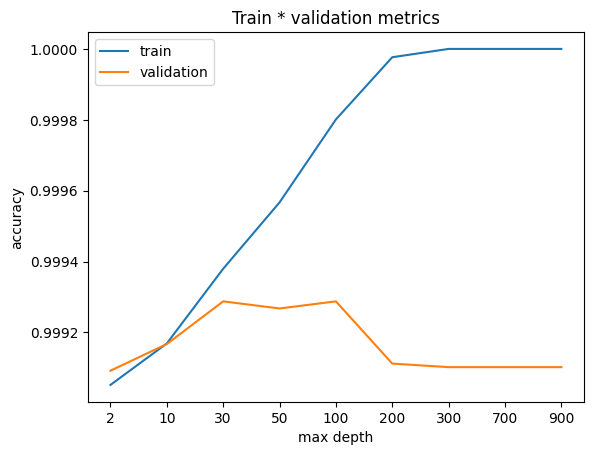

In [11]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=2)
    model.fit(X_train,Y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train,Y_train)
    accuracy_test = accuracy_score(prediction_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
plt.title("Train * validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(["train","validation"])
# reqd lower min samples split and higher max depth
# training error less and validation error means overfiiting so it is btter to have 30,50,100 it 

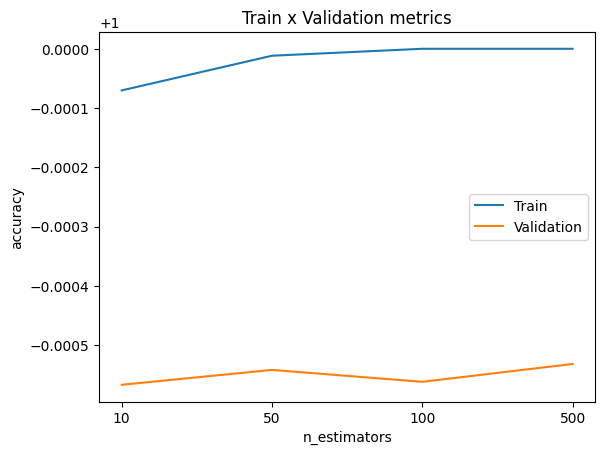

In [15]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 2).fit(X_train,Y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_val = accuracy_score(predictions_val,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
# jitne jyada log estimate krenge utne bdhiya

In [16]:
model = DecisionTreeClassifier(min_samples_split=30,max_depth=30)
model.fit(X_train,Y_train)
accuracy_score(model.predict(X_test),Y_test)

0.9990620219195947

In [17]:
model = DecisionTreeClassifier(min_samples_split=10,max_depth=30)
model.fit(X_train,Y_train)
accuracy_score(model.predict(X_test),Y_test)

0.999057005994031

In [18]:
model = DecisionTreeClassifier(min_samples_split=10,max_depth=50)
model.fit(X_train,Y_train)
accuracy_score(model.predict(X_test),Y_test)

0.9991272289519224

# XGBOOST

In [23]:
n = int(len(X_train)*0.8)

In [34]:
X_train_fit,X_val_fit,Y_train_fit,Y_val_fit = X_train[:n],X_train[n:],Y_train[:n],Y_train[n:]

verbosity = 0  # Silent (no output)<br>
verbosity = 1  # Warning only<br>
verbosity = 2  # Info messages<br>
verbosity = 3  # Debug information


In [35]:
model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    verbosity=1,
    random_state=2
)
model.set_params(early_stopping_rounds=10)  # Setting early_stopping_rounds
model.fit(X_train_fit, Y_train_fit, eval_set=[(X_val_fit, Y_val_fit)])

[0]	validation_0-logloss:0.59834
[1]	validation_0-logloss:0.52069
[2]	validation_0-logloss:0.45594
[3]	validation_0-logloss:0.40121
[4]	validation_0-logloss:0.35444
[5]	validation_0-logloss:0.31417
[6]	validation_0-logloss:0.27923
[7]	validation_0-logloss:0.24876
[8]	validation_0-logloss:0.22207
[9]	validation_0-logloss:0.19859
[10]	validation_0-logloss:0.17787
[11]	validation_0-logloss:0.15952
[12]	validation_0-logloss:0.14324
[13]	validation_0-logloss:0.12876
[14]	validation_0-logloss:0.11587
[15]	validation_0-logloss:0.10436
[16]	validation_0-logloss:0.09408
[17]	validation_0-logloss:0.08488
[18]	validation_0-logloss:0.07665
[19]	validation_0-logloss:0.06926
[20]	validation_0-logloss:0.06264
[21]	validation_0-logloss:0.05669
[22]	validation_0-logloss:0.05134
[23]	validation_0-logloss:0.04653
[24]	validation_0-logloss:0.04221
[25]	validation_0-logloss:0.03832
[26]	validation_0-logloss:0.03482
[27]	validation_0-logloss:0.03167
[28]	validation_0-logloss:0.02882
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [37]:
model.best_iteration

49

In [38]:
accuracy_score(model.predict(X_val_fit),Y_val_fit)

0.9994733454268828

In [41]:
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    verbosity=1,
    random_state=2
)
model.set_params(early_stopping_rounds=10)  # Setting early_stopping_rounds
model.fit(X_train_fit, Y_train_fit, eval_set=[(X_val_fit, Y_val_fit)])

[0]	validation_0-logloss:0.59834
[1]	validation_0-logloss:0.52069
[2]	validation_0-logloss:0.45594
[3]	validation_0-logloss:0.40121
[4]	validation_0-logloss:0.35444
[5]	validation_0-logloss:0.31417
[6]	validation_0-logloss:0.27923
[7]	validation_0-logloss:0.24876
[8]	validation_0-logloss:0.22207
[9]	validation_0-logloss:0.19859
[10]	validation_0-logloss:0.17787
[11]	validation_0-logloss:0.15952
[12]	validation_0-logloss:0.14324
[13]	validation_0-logloss:0.12876
[14]	validation_0-logloss:0.11587
[15]	validation_0-logloss:0.10436
[16]	validation_0-logloss:0.09408
[17]	validation_0-logloss:0.08488
[18]	validation_0-logloss:0.07665
[19]	validation_0-logloss:0.06926
[20]	validation_0-logloss:0.06264
[21]	validation_0-logloss:0.05669
[22]	validation_0-logloss:0.05134
[23]	validation_0-logloss:0.04653
[24]	validation_0-logloss:0.04221
[25]	validation_0-logloss:0.03832
[26]	validation_0-logloss:0.03482
[27]	validation_0-logloss:0.03167
[28]	validation_0-logloss:0.02882
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [42]:
accuracy_score(model.predict(X_val_fit),Y_val_fit)

0.9994733454268828

In [ ]:
"A machine learning model for detecting fraudulent credit card transactions using anonymized transaction data and supervised learning techniques."